In [1]:
from cos_pos_emb import positional_encoding_auto_ND
from utils import run_tsne
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
EMB_DIM = 512
SEQ_LEN = 2048
emb = positional_encoding_auto_ND(seq_length=SEQ_LEN, emb_dim=EMB_DIM, space_dim=1)

emb_flat = emb.copy().squeeze().reshape((-1, EMB_DIM))

tsne_out = run_tsne(emb_flat)

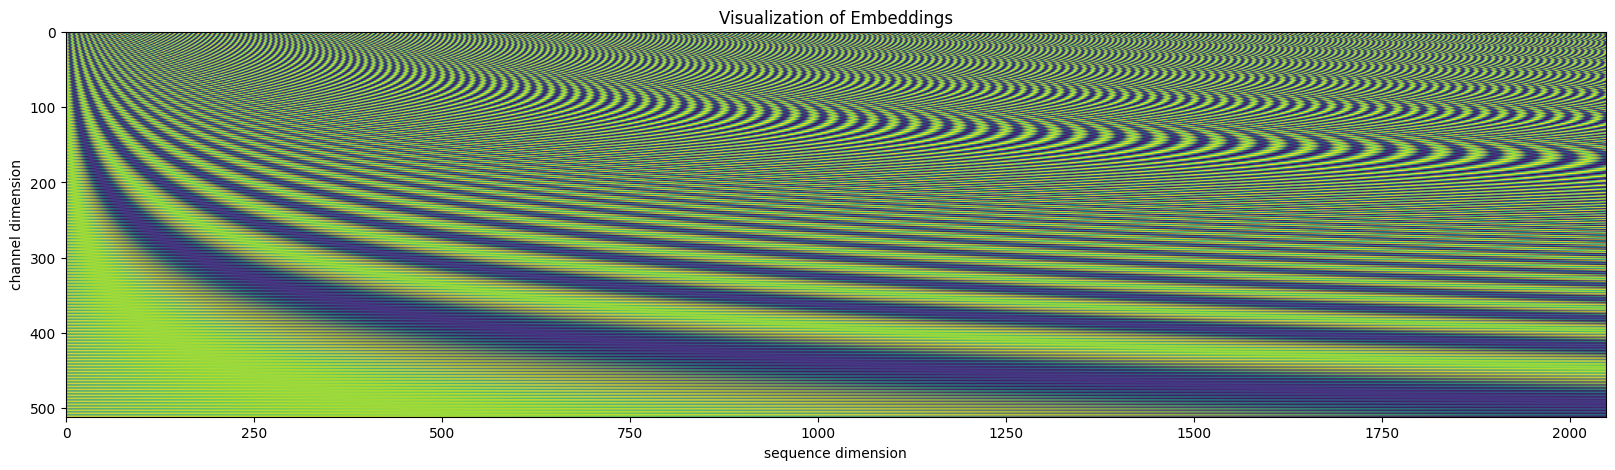

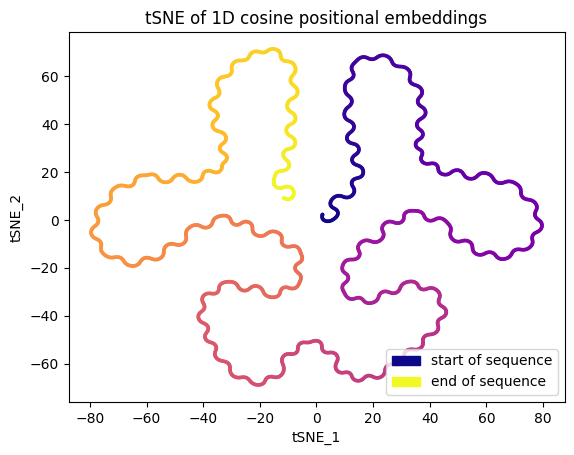

In [3]:
plt.figure(figsize=(20, 5))
plt.imshow(emb_flat.T)
plt.ylabel('channel dimension')
plt.xlabel('sequence dimension')
plt.title('Visualization of Embeddings')

plt.savefig('figures/1d_flat_emb.png')
plt.show()

plt.figure()
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], s=3,  c=np.arange(tsne_out.shape[0]), cmap='plasma')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title('tSNE of 1D cosine positional embeddings')

red_patch = mpatches.Patch(color='#0d0887', label='start of sequence')
green_patch = mpatches.Patch(color='#f0f921', label='end of sequence')
plt.legend(handles=[red_patch, green_patch])
plt.savefig('figures/1d_tsne.png')
plt.show()

In [4]:
EMB_DIM = 512
WIDTH = 64
HEIGHT = 64

emb = positional_encoding_auto_ND(seq_length=[WIDTH, HEIGHT], emb_dim=EMB_DIM, space_dim=2)

colors = np.zeros((WIDTH, HEIGHT, 3), dtype='float32')
colors[:, :, 0] = np.linspace(1, 0, HEIGHT)[None, :]
colors[:, :, 1] = np.linspace(1, 0, WIDTH)[:, None]

emb_flat = emb.copy().squeeze().reshape((-1, EMB_DIM))
colors = colors.reshape((-1, 3))

tsne_out = run_tsne(emb_flat)

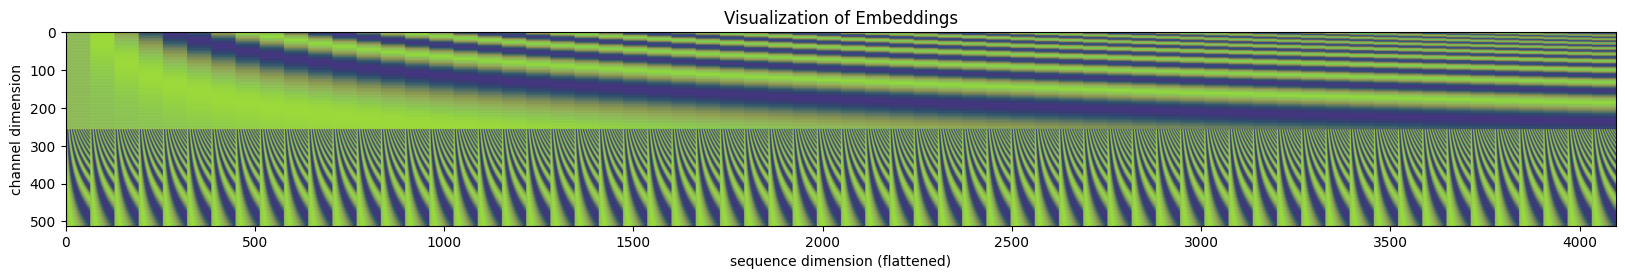

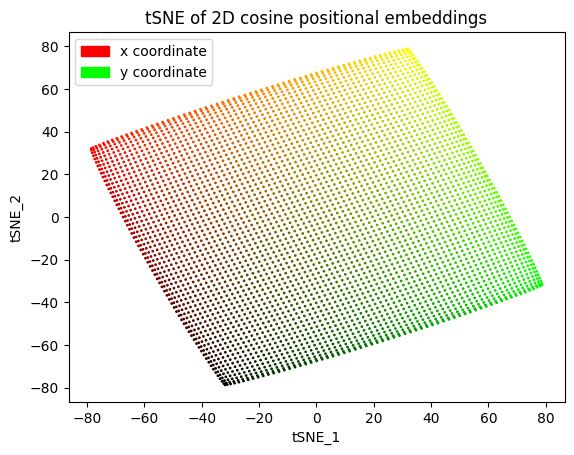

In [5]:
plt.figure(figsize=(20, 5))
plt.imshow(emb_flat.T)
plt.ylabel('channel dimension')
plt.xlabel('sequence dimension (flattened)')
plt.title('Visualization of Embeddings')

plt.savefig('figures/2d_flat_emb.png')
plt.show()

plt.figure()
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], s=1, c=colors)
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title('tSNE of 2D cosine positional embeddings')

red_patch = mpatches.Patch(color='#FF0000', label='x coordinate')
green_patch = mpatches.Patch(color='#00FF00', label='y coordinate')
plt.legend(handles=[red_patch, green_patch])
plt.savefig('figures/2d_tsne.png')
plt.show()

In [6]:
EMB_DIM = 600
WIDTH = 16
HEIGHT = 16
DEPTH = 16

emb = positional_encoding_auto_ND(seq_length=[WIDTH, HEIGHT, DEPTH], emb_dim=EMB_DIM, space_dim=3)

colors = np.zeros((WIDTH, HEIGHT, DEPTH, 3), dtype='float32')
colors[:, :, :, 0] = np.linspace(1, 0, HEIGHT)[None, :, None]
colors[:, :, :, 1] = np.linspace(1, 0, WIDTH)[:, None, None]
colors[:, :, :, 2] = np.linspace(1, 0, DEPTH)[None, None, :]

emb_flat = emb.copy().squeeze().reshape((-1, EMB_DIM))
colors = colors.reshape((-1, 3))

tsne_out = run_tsne(emb_flat, n_components=3)

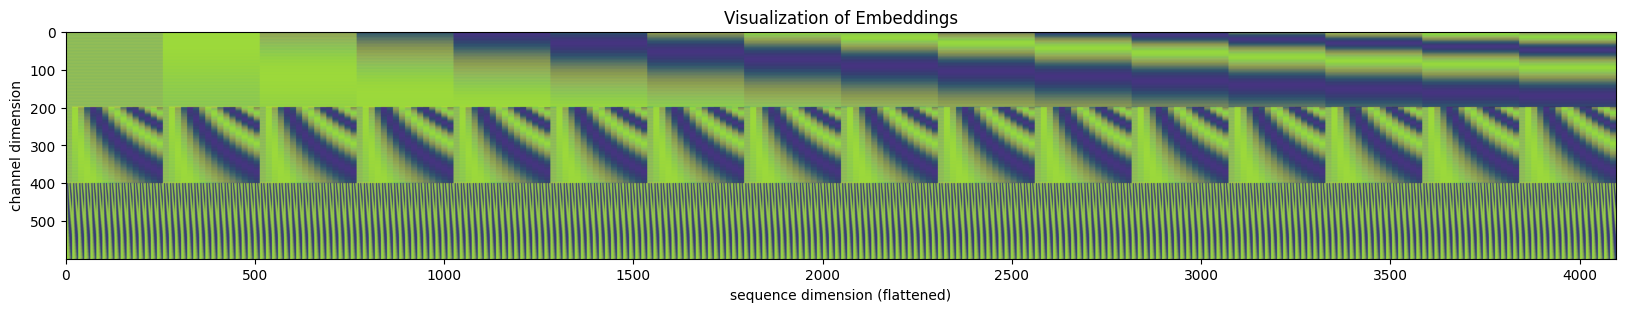

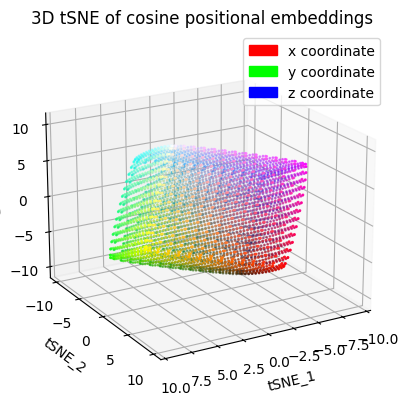

In [7]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(20, 5))
plt.imshow(emb_flat.T)
plt.ylabel('channel dimension')
plt.xlabel('sequence dimension (flattened)')
plt.title('Visualization of Embeddings')

plt.savefig('figures/3d_flat_emb.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    tsne_out[:, 0],
    tsne_out[:, 1],
    tsne_out[:, 2],
    s=1,
    c=colors
)

ax.set_xlabel('tSNE_1')
ax.set_ylabel('tSNE_2')
ax.set_zlabel('tSNE_3')
ax.set_title('3D tSNE of cosine positional embeddings')

red_patch = mpatches.Patch(color='#FF0000', label='x coordinate')
green_patch = mpatches.Patch(color='#00FF00', label='y coordinate')
blue_patch = mpatches.Patch(color='#0000FF', label='z coordinate')

ax.legend(handles=[red_patch, green_patch, blue_patch])
ax.view_init(elev=20, azim=60)
plt.savefig('figures/3d_tsne.png')
plt.show()
